<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/CointegrdePortfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#baixar bibliotecas
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 5.6 MB/s 
     |████████████████████████████████| 6.4 MB 9.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

In [3]:
#Fuunção para avaliar estacionaridade de uma série
def avalia_estacionaridade(X, cutoff = 0.01):
  #H0 teste com raiz unitaria (não-estacionaria)
  pvalue = adfuller(X)[1]
  if pvalue < cutoff:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' é estacionária')
    return True
  else:
    print('pvalue =' + str(pvalue) + ' A Série ' + X.name + ' não é estacionária')
    return False

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

In [11]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys=data.keys()
    pairs=[]
    for i in range(n):
        for j in range(i+1, n):
             S1 = data[keys[i]]
             S2 = data[keys[j]]
             result = coint(S1, S2)
             score = result[0]
             pvalue = result[1]
             score_matrix[i, j] = score
             pvalue_matrix[i, j] = pvalue
             if pvalue < 0.05:
                 pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs
 
#função para plotar pares
def plotPares(d2, par):
    (d2[par[0]]/np.mean(d2[par[0]])).plot()
    (d2[par[1]]/np.mean(d2[par[1]])).plot()
    plt.legend(par)
    plt.show()

In [12]:
# o ratio não é muito indicado para avaliar as possiveis entradas nos trades:
def zscore(series):
  return (series - series.mean())/np.std(series)
def desenhaRatio(d2,par):

  #d2 - dataframe
  data = d2
  S1 = data[par[0]]
  S2 = data[par[1]]
    
  score, pvalue, _ = coint(S1, S2)
  print('P-valor =',pvalue)
  ratios= S1/S2

  zscore(ratios).plot(figsize=(15,7))

  plt.axhline(zscore(ratios).mean(), color='black')
  plt.axhline(1.0, color='red', linestyle='--')
  plt.axhline(-1.0, color='green', linestyle='--')
  plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
  plt.show()

In [15]:
#Portfólio 
symbols = ['SOL-USD','LUNA1-USD','BNB-USD','LTC-USD','XMR-USD','AAVE-USD']
portfolio = web.get_data_yahoo(symbols, period='1y')['Close']
portfolio = portfolio.rename(columns={'SOL-USD':'Solana','LUNA1-USD':'Luna','BNB-USD':'BNB','LTC-USD':'Litecoin','XMR-USD':'Monero','AAVE-USD':'AAVE'})

[*********************100%***********************]  6 of 6 completed


In [16]:
portfolio


,AAVE,BNB,Litecoin,Luna,Solana,Monero
Date,,,,,,
2021-05-07,445.222382,624.563293,346.253571,16.582764,43.155018,457.144989
2021-05-08,466.317566,646.100830,346.368744,16.984989,45.561531,475.472778
2021-05-09,459.587219,662.228577,386.450775,16.993803,44.330196,483.583618
2021-05-10,433.053558,631.351990,359.329315,15.868883,42.909634,441.637360
2021-05-11,457.178070,672.333923,377.388794,16.311174,44.577469,453.531128
...,...,...,...,...,...,...
2022-05-03,141.099213,383.475800,99.343018,82.594147,85.842377,207.541031
2022-05-04,159.080444,402.502655,106.274864,86.172264,92.770851,225.181686
2022-05-05,141.561218,378.773621,96.918915,82.580406,84.596024,206.622375


In [17]:
scores, pvalues, pairs = find_cointegrated_pairs(portfolio.dropna())


In [18]:
# mostra os pares cointegrados
print(pairs)

[('AAVE', 'Litecoin'), ('AAVE', 'Luna'), ('BNB', 'Solana'), ('Litecoin', 'Luna'), ('Litecoin', 'Solana')]


Escolher alguns pares para plotar

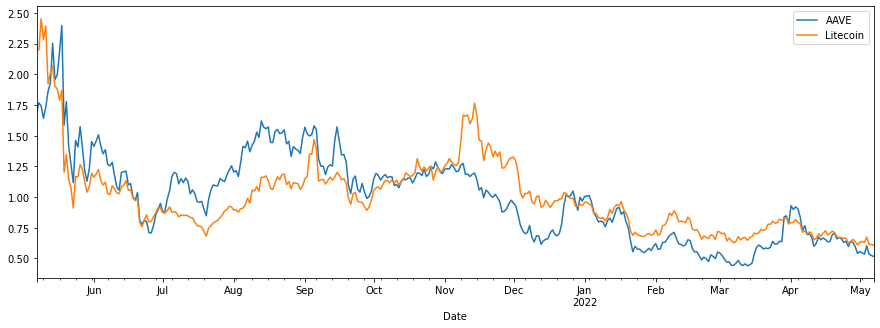

In [20]:

#('AAVE', 'Litecoin')
plotPares(portfolio, pairs[0])

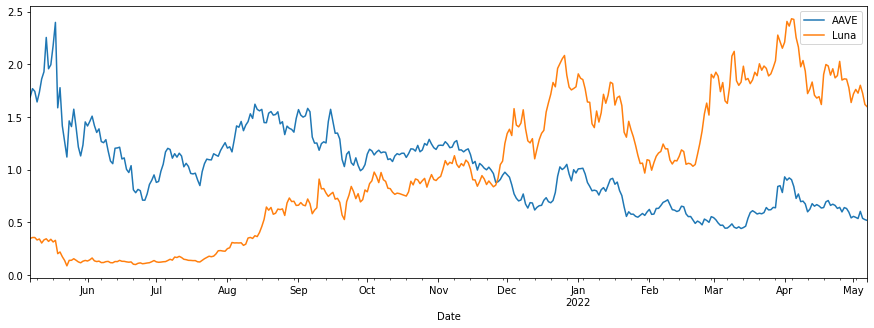

In [21]:
#('AAVE', 'Luna')
plotPares(portfolio, pairs[1])

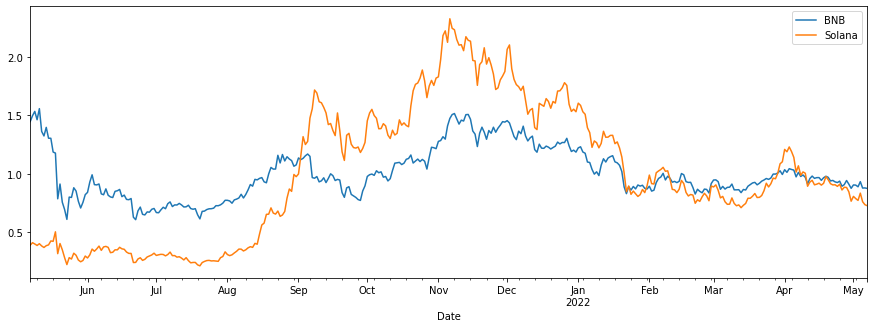

In [22]:
#('BNB', 'Solana')
plotPares(portfolio, pairs[2])

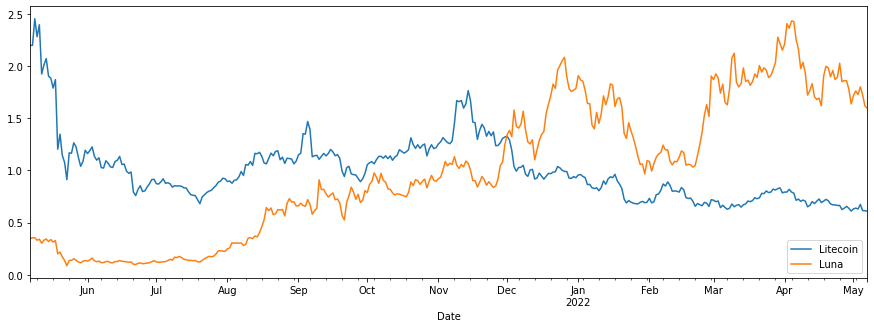

In [24]:
#('Litecoin', 'Luna')
plotPares(portfolio, pairs[3])

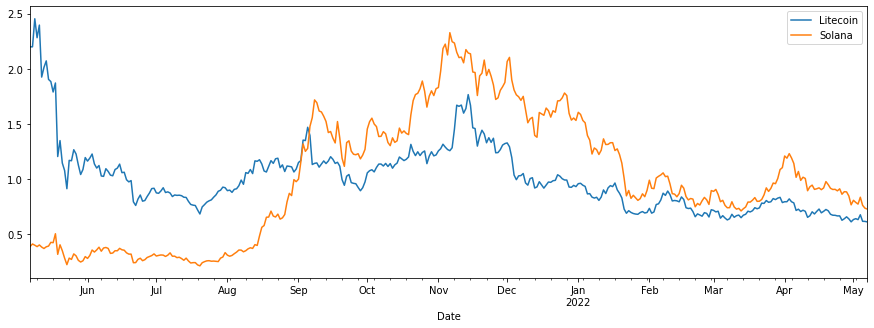

In [25]:
#('Litecoin', 'Solana')
plotPares(portfolio, pairs[4])